In [9]:
using Distributions
using HypothesisTests
using Random
using StatsPlots
default(fmt=:png)

_ecdf(A, x) = count(≤(x), A) / length(A)

_ecdf (generic function with 1 method)

kurtosis(dist) = 1.5


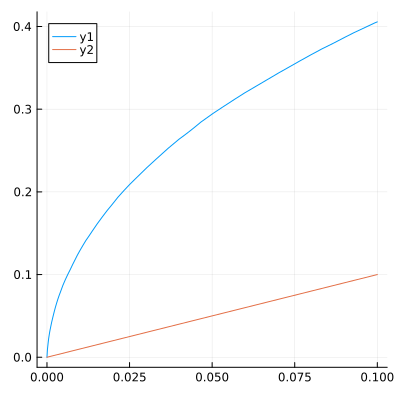

In [25]:
function simSW(; dist=Gamma(4, 1/4), n=20, L=10^5)
    @show kurtosis(dist)
    pval_SW = zeros(L)
    Xtmp = rand(dist, n)
    for i in 1:L
        X = rand!(dist, Xtmp)
        pval_SW[i] = pvalue(ShapiroWilkTest(X))
    end
    (; pval_SW)
end

(; pval_SW) = simSW()
plot(alpha -> _ecdf(pval_SW, alpha), 0, 0.1; label="Shapiro-Wilk test")
plot!(identity)
plot!(size=(400, 400))